In [1]:
import numpy
from scipy import stats
from scipy.optimize import minimize
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
N = 500

def real_f(x):
    return 0.5 * x  + 1

def f(params, x):
    return params[0] * x + params[1]

sample = numpy.array(
    [(x, real_f(x) + error) for x, error in zip(
            numpy.linspace(0, 20, N), stats.norm.rvs(0, scale=numpy.sqrt(0.2), size=N)
    )]
)

In [3]:
def MSE(params, sample):
    return numpy.sum(
        numpy.array(
            [(params[0] * x + params[1] - y) ** 2 for x, y in zip(sample[:,0], sample[:,1])]
        )
    )

def MAE(params, sample):
    return numpy.sum(
        numpy.array(
            [numpy.absolute(params[0] * x + params[1] - y) for x, y in zip(sample[:,0], sample[:,1])]
        )
    )

params_0 = [0, 0]
mse_res = minimize(MSE, params_0, args=sample)
mae_res = minimize(MAE, params_0, args=sample)

In [4]:
mse_res

      fun: 100.50601644840157
 hess_inv: array([[  2.98802527e-05,  -2.98802568e-04],
       [ -2.98802568e-04,   3.98802620e-03]])
      jac: array([  1.90734863e-06,   9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([ 0.49772931,  1.02395687])

In [5]:
mae_res

      fun: 178.53436645844312
 hess_inv: array([[  2.25637512e-05,  -8.71473982e-05],
       [ -8.71473982e-05,   3.75379918e-04]])
      jac: array([ 8.73747635,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 337
      nit: 10
     njev: 83
   status: 2
  success: False
        x: array([ 0.49473412,  1.06009788])

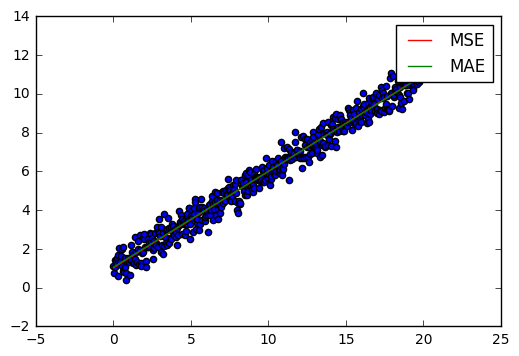

In [6]:
plot.scatter(sample[:,0], sample[:,1])
plot.plot([0, 20], [f(mse_res['x'], 0), f(mse_res['x'], 20)], color="red", label="MSE")
plot.plot([0, 20], [f(mae_res['x'], 0), f(mae_res['x'], 20)], color="green", label="MAE")
axis = plot.gca()
axis.legend()

Результат работы двух методов почти совпал

In [7]:
bad_sample = [(x, y) for x, y in sample]
bad_sample.extend(
    (x, -1 + error)
    for x, error in zip(numpy.linspace(0, 20, 75), stats.norm.rvs(0, scale=numpy.sqrt(0.2), size=75))
)
bad_sample = numpy.array(bad_sample)

In [8]:
bad_mse_res = minimize(MSE, params_0, args=bad_sample)
bad_mae_res = minimize(MAE, params_0, args=bad_sample)

In [9]:
bad_mse_res

      fun: 3728.6482578864934
 hess_inv: array([[  9.39655454e-06,  -2.47880088e-05],
       [ -2.47880088e-05,   1.30902263e-04]])
      jac: array([  3.05175781e-05,   0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 41
      nit: 5
     njev: 10
   status: 2
  success: False
        x: array([ 0.43278255,  0.77671245])

In [10]:
bad_mae_res

      fun: 692.2336150468608
 hess_inv: array([[  1.32234274e-05,  -6.22953470e-05],
       [ -6.22953470e-05,   3.13967004e-04]])
      jac: array([-8.73690033, -3.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 620
      nit: 11
     njev: 152
   status: 2
  success: False
        x: array([ 0.49745619,  0.95498836])

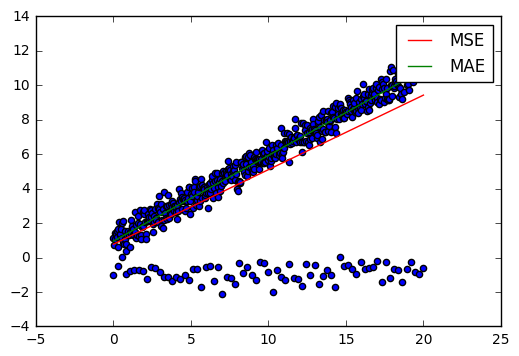

In [11]:
plot.scatter(bad_sample[:,0], bad_sample[:,1])
plot.plot([0, 20], [f(bad_mse_res['x'], 0), f(bad_mse_res['x'], 20)], color="red", label="MSE")
plot.plot([0, 20], [f(bad_mae_res['x'], 0), f(bad_mae_res['x'], 20)], color="green", label="MAE")
axis = plot.gca()
axis.legend()

Очевидно, MAE намного устойчивее к выбросам, чем  MSE